In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [6]:
confusion_mtx

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[143,  13,  37,  15,  18,  28],
       [ 19, 172,   6,  11,  29,  17],
       [ 25,   2, 153,  28,  46,   0],
       [  9,  19,  21, 145,  16,   8],
       [ 15,  24,  33,  10, 165,   8],
       [ 18,  35,   1,   7,  13, 180]])>

7/7 [==============================] - 0s 16ms/step


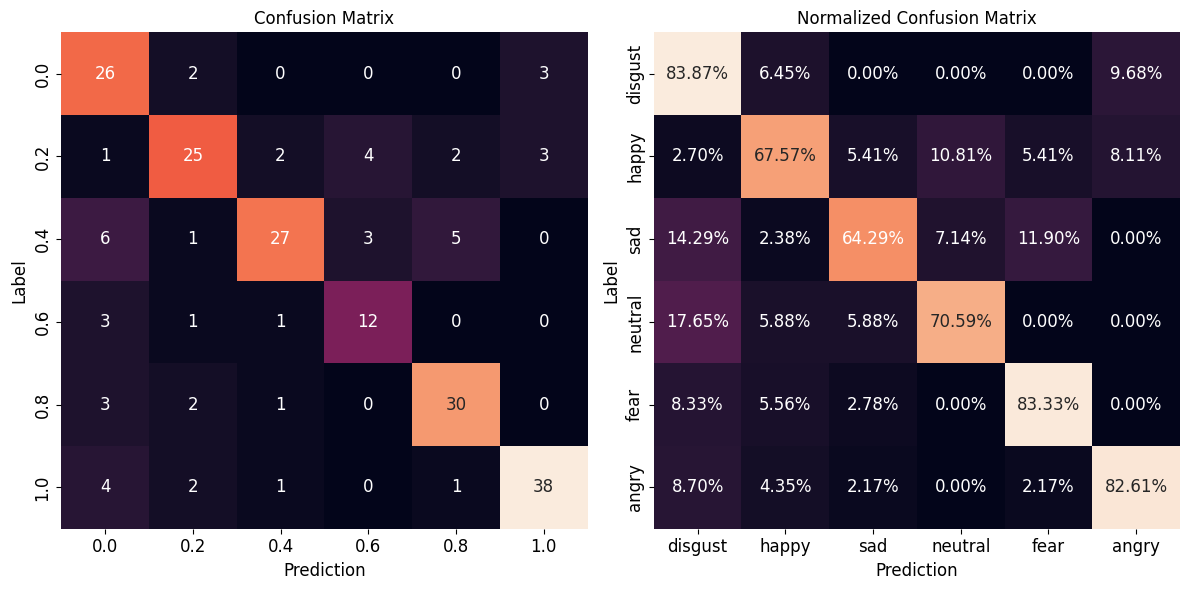

In [10]:
loaded_model = tf.keras.models.load_model("RavdessCNNLSTM")

test_data_value = np.load("saved_dataset/ravdessFix/ravdess_test.npy")
test_data_target = np.load("saved_dataset/ravdessFix/ravdess_test_target.npy")

predictions = loaded_model.predict(test_data_value)
predicted_labels = np.argmax(predictions, axis=1)
confusion_matrix = tf.math.confusion_matrix(test_data_target, predicted_labels)

test_loss, test_acc = loaded_model.evaluate(test_data_value, test_data_target)

y_pred = loaded_model.predict(test_data_value)
y_pred = tf.argmax(y_pred, axis=1)
y_true_tensor = tf.convert_to_tensor(test_data_target)

confusion_mtx = tf.math.confusion_matrix(y_true_tensor, y_pred)
confusion_array = confusion_mtx.numpy()
row_sums = confusion_array.sum(axis=1, keepdims=True)
normalized_confusion_array = confusion_array / row_sums

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].set_title('Confusion Matrix')
sns.heatmap(confusion_mtx,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='g', cbar=False, ax=axs[0], annot_kws={"fontsize": 12})
axs[0].set_xlabel('Prediction', fontsize=12)
axs[0].set_ylabel('Label', fontsize=12)
axs[0].set_xticklabels(axs[1].get_xticklabels(), fontsize=12)
axs[0].set_yticklabels(axs[1].get_yticklabels(), fontsize=12)

axs[1].set_title('Normalized Confusion Matrix')
sns.heatmap(normalized_confusion_array,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='.2%', cbar=False, ax=axs[1], annot_kws={"fontsize": 12})
axs[1].set_xlabel('Prediction', fontsize=12)
axs[1].set_ylabel('Label', fontsize=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

47/47 [==============================] - 1s 12ms/step


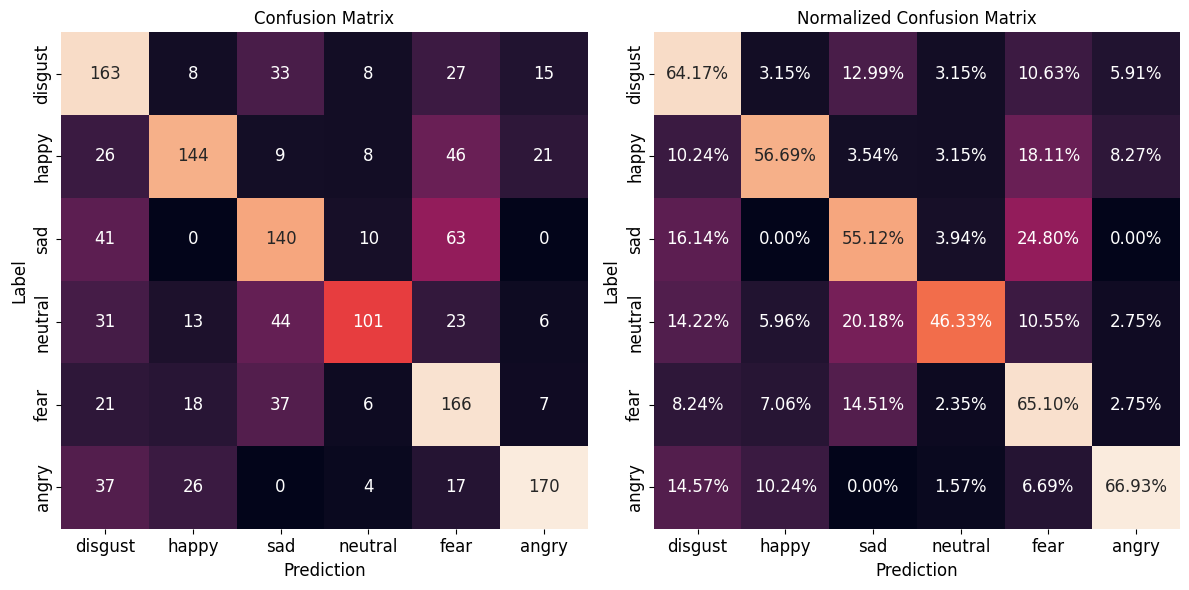

In [13]:
loaded_model = tf.keras.models.load_model("RobustCNNLSTM-CREMA-DataLamaf32Lagi")

test_data_value = np.load(
    'saved_dataset/crema_d_f32_test_data_value.npy')
test_data_target = np.load('saved_dataset/crema_d_f32_test_data_target.npy')

predictions = loaded_model.predict(test_data_value)
predicted_labels = np.argmax(predictions, axis=1)
confusion_matrix = tf.math.confusion_matrix(test_data_target, predicted_labels)

test_loss, test_acc = loaded_model.evaluate(test_data_value, test_data_target)

y_pred = loaded_model.predict(test_data_value)
y_pred = tf.argmax(y_pred, axis=1)
y_true_tensor = tf.convert_to_tensor(test_data_target)

confusion_mtx = tf.math.confusion_matrix(y_true_tensor, y_pred)
confusion_array = confusion_mtx.numpy()
row_sums = confusion_array.sum(axis=1, keepdims=True)
normalized_confusion_array = confusion_array / row_sums

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].set_title('Confusion Matrix')
sns.heatmap(confusion_mtx,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='g', cbar=False, ax=axs[0], annot_kws={"fontsize": 12})
axs[0].set_xlabel('Prediction', fontsize=12)
axs[0].set_ylabel('Label', fontsize=12)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=12)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=12)

axs[1].set_title('Normalized Confusion Matrix')
sns.heatmap(normalized_confusion_array,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='.2%', cbar=False, ax=axs[1], annot_kws={"fontsize": 12})
axs[1].set_xlabel('Prediction', fontsize=12)
axs[1].set_ylabel('Label', fontsize=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

In [37]:
loaded_model = tf.keras.models.load_model("RobustCNNLSTM-CREMA-DataLamaf32Lagi")

test_data_value = np.load(
    'saved_dataset/crema_d_f32_test_data_value.npy')
test_data_target = np.load('saved_dataset/crema_d_f32_test_data_target.npy')


predictions = loaded_model.predict(test_data_value)  
predicted_labels = tf.argmax(predictions, axis=1)

precision = precision_score(test_data_target, predicted_labels, average=None)
recall = recall_score(test_data_target, predicted_labels, average=None)
f1 = f1_score(test_data_target, predicted_labels, average=None)

print("Each Class")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))


precision = precision_score(test_data_target, predicted_labels, average="macro")
recall = recall_score(test_data_target, predicted_labels, average="macro")
f1 = f1_score(test_data_target, predicted_labels, average="macro")

print("Macro")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

precision = precision_score(test_data_target, predicted_labels, average="micro")
recall = recall_score(test_data_target, predicted_labels, average="micro")
f1 = f1_score(test_data_target, predicted_labels, average="micro")

print("Micro")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

precision = precision_score(test_data_target, predicted_labels, average="weighted")
recall = recall_score(test_data_target, predicted_labels, average="weighted")
f1 = f1_score(test_data_target, predicted_labels, average="weighted")

print("Weighted")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

47/47 [==============================] - 2s 13ms/step
Each Class
Precision:[0.62445415 0.6490566  0.60956175 0.6712963  0.57491289 0.74688797]
Recall:[0.56299213 0.67716535 0.6023622  0.66513761 0.64705882 0.70866142]
F1:[0.59213251 0.6628131  0.60594059 0.66820276 0.60885609 0.72727273]
Macro
Precision:0.6460282767200978
Recall:0.6438962567617527
F1:0.6442029636942369
Micro
Precision:0.6433848220282069
Recall:0.6433848220282069
F1:0.6433848220282069
Weighted
Precision:0.6453696037251501
Recall:0.6433848220282069
F1:0.6435989746268687


In [40]:
loaded_model = tf.keras.models.load_model("RavdessCNNLSTM")

test_data_value = np.load("saved_dataset/ravdessFix/ravdess_test.npy")
test_data_target = np.load("saved_dataset/ravdessFix/ravdess_test_target.npy")

predictions = loaded_model.predict(test_data_value)  # X_eval represents your evaluation data features
predicted_labels = tf.argmax(predictions, axis=1)

precision = precision_score(test_data_target, predicted_labels, average=None)
recall = recall_score(test_data_target, predicted_labels, average=None)
f1 = f1_score(test_data_target, predicted_labels, average=None)

print("Each Class")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))


precision = precision_score(test_data_target, predicted_labels, average="macro")
recall = recall_score(test_data_target, predicted_labels, average="macro")
f1 = f1_score(test_data_target, predicted_labels, average="macro")

print("Macro")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

precision = precision_score(test_data_target, predicted_labels, average="micro")
recall = recall_score(test_data_target, predicted_labels, average="micro")
f1 = f1_score(test_data_target, predicted_labels, average="micro")

print("Micro")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

precision = precision_score(test_data_target, predicted_labels, average="weighted")
recall = recall_score(test_data_target, predicted_labels, average="weighted")
f1 = f1_score(test_data_target, predicted_labels, average="weighted")

print("Weighted")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

7/7 [==============================] - 1s 22ms/step
Each Class
Precision:[0.60465116 0.75757576 0.84375    0.63157895 0.78947368 0.86363636]
Recall:[0.83870968 0.67567568 0.64285714 0.70588235 0.83333333 0.82608696]
F1:[0.7027027  0.71428571 0.72972973 0.66666667 0.81081081 0.84444444]
Macro
Precision:0.7484443192636276
Recall:0.7537575231247371
F1:0.7447733447733449
Micro
Precision:0.7559808612440191
Recall:0.7559808612440191
F1:0.7559808612440191
Weighted
Precision:0.7707997920618636
Recall:0.7559808612440191
F1:0.7570716307558413


In [41]:
loaded_model = tf.keras.models.load_model("checkpoints/saveeSavedModel3/")

test_data_value = np.load('saved_dataset/saveeFix/standardSR_savee_test.npy')
test_data_target = np.load(
    'saved_dataset/saveeFix/standardSR_savee_test_target.npy')

predictions = loaded_model.predict(test_data_value)  # X_eval represents your evaluation data features
predicted_labels = tf.argmax(predictions, axis=1)

precision = precision_score(test_data_target, predicted_labels, average=None)
recall = recall_score(test_data_target, predicted_labels, average=None)
f1 = f1_score(test_data_target, predicted_labels, average=None)

print("Each Class")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))


precision = precision_score(test_data_target, predicted_labels, average="macro")
recall = recall_score(test_data_target, predicted_labels, average="macro")
f1 = f1_score(test_data_target, predicted_labels, average="macro")

print("Macro")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

precision = precision_score(test_data_target, predicted_labels, average="micro")
recall = recall_score(test_data_target, predicted_labels, average="micro")
f1 = f1_score(test_data_target, predicted_labels, average="micro")

print("Micro")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

precision = precision_score(test_data_target, predicted_labels, average="weighted")
recall = recall_score(test_data_target, predicted_labels, average="weighted")
f1 = f1_score(test_data_target, predicted_labels, average="weighted")

print("Weighted")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

3/3 [==============================] - 1s 27ms/step
Each Class
Precision:[1.         0.84615385 0.75       0.82758621 0.71428571 0.93333333]
Recall:[0.45454545 0.78571429 0.92307692 0.88888889 0.90909091 0.875     ]
F1:[0.625      0.81481481 0.82758621 0.85714286 0.8        0.90322581]
Macro
Precision:0.8452265167782409
Recall:0.8060527435527435
F1:0.8046282808843062
Micro
Precision:0.8260869565217391
Recall:0.8260869565217391
F1:0.8260869565217391
Weighted
Precision:0.8449071480743146
Recall:0.8260869565217391
F1:0.8199510667733211


In [2]:
loaded_model = tf.keras.models.load_model("saved_model/2RobustCNNLSTM")


In [3]:
predictions = loaded_model.predict(test_data_value)
predicted_labels = np.argmax(predictions, axis=1)
confusion_matrix = tf.math.confusion_matrix(test_data_target, predicted_labels)

47/47 [==============================] - 8s 14ms/step


In [4]:
print(confusion_matrix)

tf.Tensor(
[[154   9  36  22   7  26]
 [ 14 165   3  23  26  23]
 [ 22   2 178  38  13   1]
 [  6  12  21 169   4   6]
 [ 29  32  55  12 115  12]
 [ 15  23   1   7   4 204]], shape=(6, 6), dtype=int32)


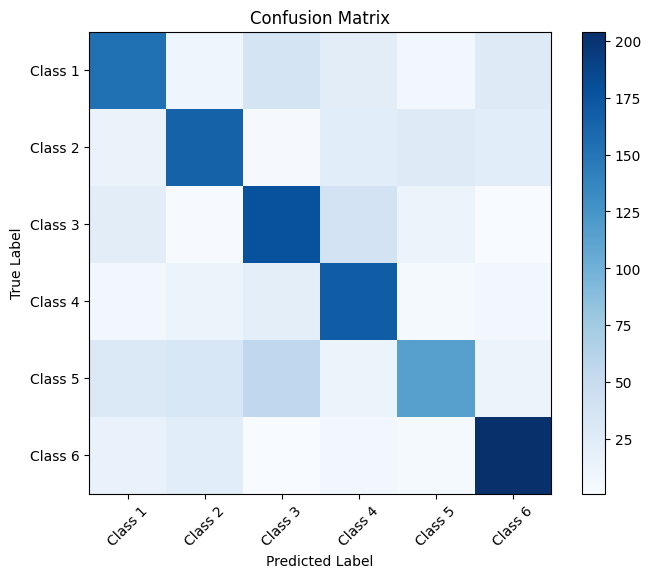

In [9]:
labels = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]  # Replace with your class labels
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
test_loss, test_acc = loaded_model.evaluate(test_data_value, test_data_target)
# y_true = []
# y_pred = []

# print(test_loss)
# print(test_acc)

y_pred = loaded_model.predict(test_data_value)
y_pred = tf.argmax(y_pred, axis=1)
# y_true = tf.concat(test_data_target)
y_true_tensor = tf.convert_to_tensor(test_data_target)

# for x,y in zip(test_data_value, test_data_target):
#     y_true.extend(tf.argmax(y))
#     y_pred.extend(tf.argmax(loaded_model.predict(x)))


# for x, y in test_data_value:
#     y_true.extend(tf.argmax(y, axis=1))
#     y_pred.extend(tf.argmax(loaded_model.predict(x), axis=1))

# cm = tf.math.confusion_matrix(y_true, y_pred)

# print('Confusion Matrix:')
# print(cm)

47/47 [==============================] - 0s 9ms/step


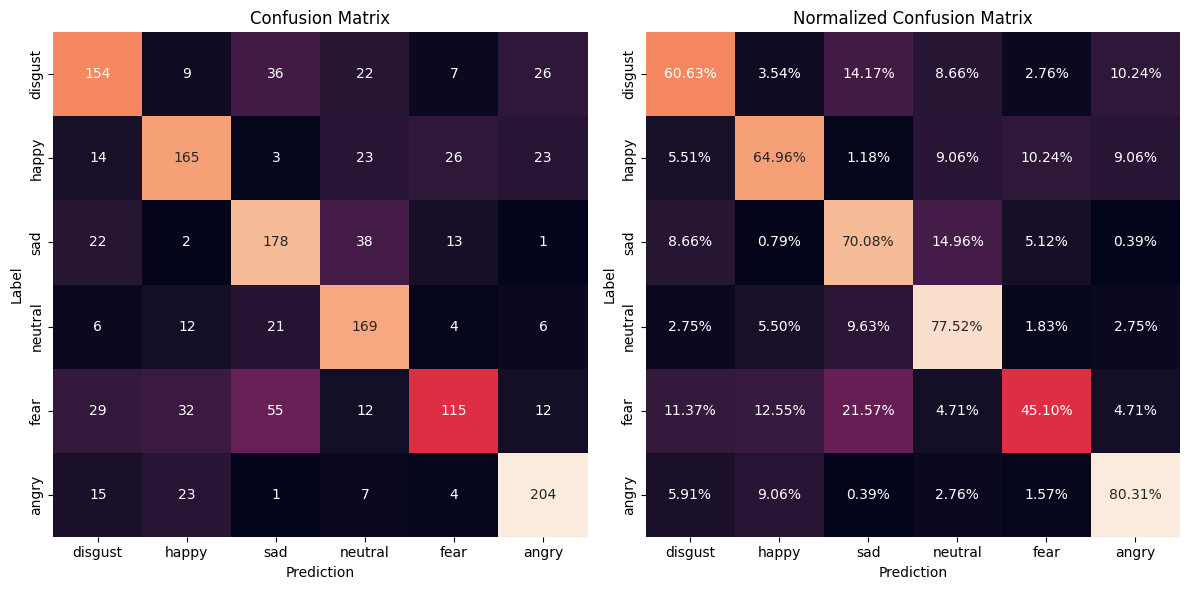

In [65]:
import seaborn as sns
labels = {'disgust': 0, 'happy': 1, 'sad': 2,
            'neutral': 3, 'fear': 4, 'angry': 5}

confusion_mtx = tf.math.confusion_matrix(y_true_tensor, y_pred)
confusion_array = confusion_mtx.numpy()
row_sums = confusion_array.sum(axis=1, keepdims=True)
normalized_confusion_array = confusion_array / row_sums

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].set_title('Confusion Matrix')
sns.heatmap(confusion_mtx,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='g', cbar=False, ax=axs[0])
axs[0].set_xlabel('Prediction')
axs[0].set_ylabel('Label')

axs[1].set_title('Normalized Confusion Matrix')
sns.heatmap(normalized_confusion_array,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='.2%', cbar=False, ax=axs[1])
axs[1].set_xlabel('Prediction')
axs[1].set_ylabel('Label')

plt.tight_layout()
plt.show()
# plt.figure(figsize=(6, 3))
# plt.title("Confusion Matrix")
# sns.heatmap(confusion_mtx,
#             xticklabels=["disgust","happy","sad","neutral","fear","angry"],
#             yticklabels=["disgust","happy","sad","neutral","fear","angry"],
#             annot=True, fmt='g', cbar=False)
# plt.xlabel('Prediction')
# plt.ylabel('Label')
# plt.show()



# plt.figure(figsize=(6, 3))
# plt.title("Normalized Confusion Matrix")
# sns.heatmap(normalized_confusion_array,
#             xticklabels=["disgust","happy","sad","neutral","fear","angry"],
#             yticklabels=["disgust","happy","sad","neutral","fear","angry"],
#             annot=True, fmt='0.2%', cbar=False)
# plt.xlabel('Prediction')
# plt.ylabel('Label')
# plt.show()


# fig, axs = plt.subplots(nrows=1, ncols=2)
# axs[0].set_title('Confusion Matrix')
# # sns.heatmap(confusion_mtx,
# #             xticklabels=["disgust","happy","sad","neutral","fear","angry"],
# #             yticklabels=["disgust","happy","sad","neutral","fear","angry"],
# #             annot=True, fmt='g')
# # axs[0].set_xlabel('Prediction')
# # axs[0].set_ylabel('Label')
# axs[1].set_title('Normalized Confusion Matrix')

# sns.heatmap(normalized_confusion_array,
#             xticklabels=["disgust","happy","sad","neutral","fear","angry"],
#             yticklabels=["disgust","happy","sad","neutral","fear","angry"],
#             annot=True, fmt='.2%')
# # axs[1].set_xlabel('Prediction')
# # axs[1].set_ylabel('Label')

# plt.tight_layout()
# plt.show()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (4).

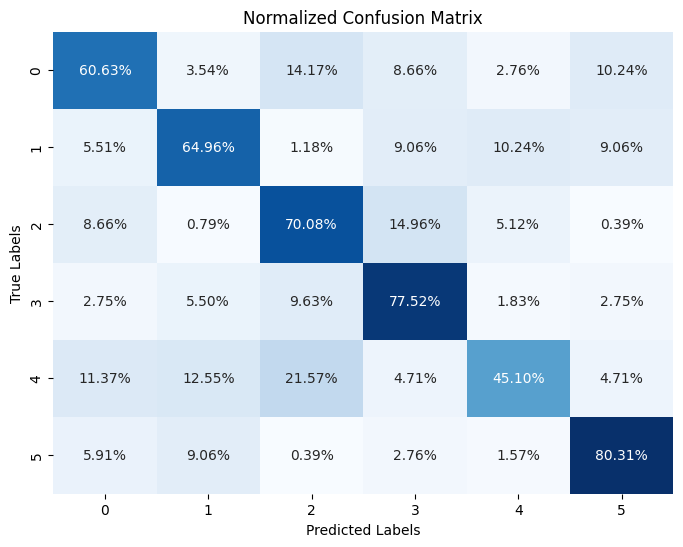

In [37]:
confusion_array = confusion_mtx.numpy()
# Calculate row sums for normalization
row_sums = confusion_array.sum(axis=1, keepdims=True)

# Normalize the confusion matrix
normalized_confusion_array = confusion_array / row_sums

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(normalized_confusion_array, annot=True, cmap='Blues', fmt='.2%', cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Normalized Confusion Matrix')

# Add tick labels
tick_labels = ['Class 1', 'Class 2', 'Class 3', ...]  # Replace with your class labels
ax.xaxis.set_ticklabels(tick_labels, rotation=45)
ax.yaxis.set_ticklabels(tick_labels, rotation=0)

# Display the plot
plt.show()

7/7 [==============================] - 0s 14ms/step


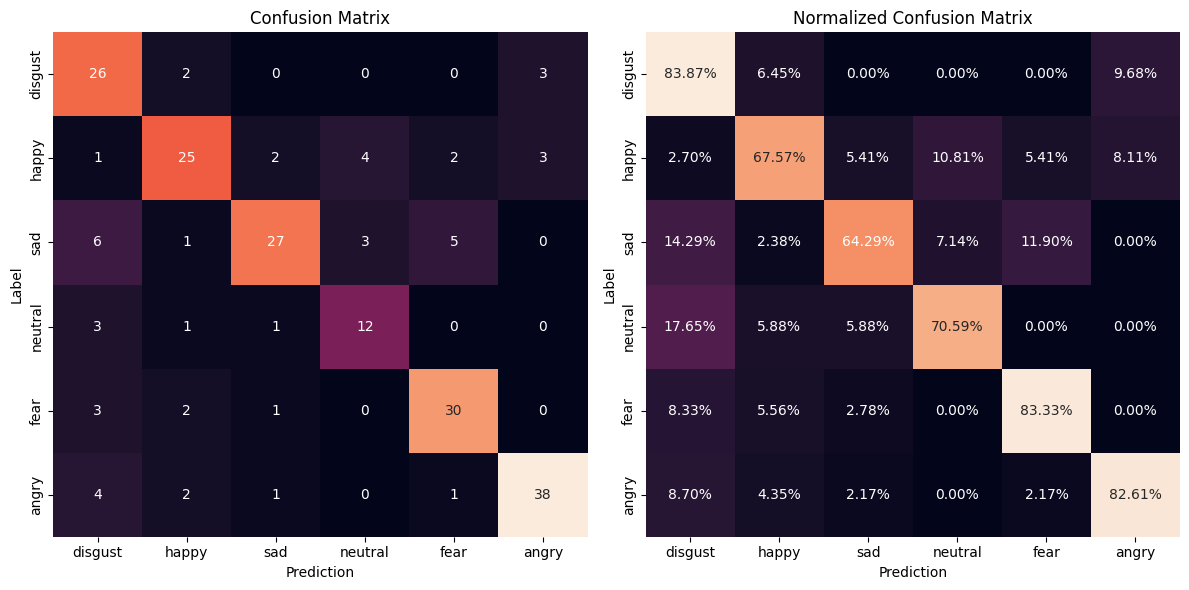

In [8]:
loaded_model = tf.keras.models.load_model("RavdessCNNLSTM")
test_data_value = np.load('saved_dataset/ravdess_test.npy')
test_data_target = np.load('saved_dataset/ravdess_test_target.npy')

predictions = loaded_model.predict(test_data_value)
predicted_labels = np.argmax(predictions, axis=1)
confusion_matrix = tf.math.confusion_matrix(test_data_target, predicted_labels)

test_loss, test_acc = loaded_model.evaluate(test_data_value, test_data_target)

y_pred = loaded_model.predict(test_data_value)
y_pred = tf.argmax(y_pred, axis=1)
y_true_tensor = tf.convert_to_tensor(test_data_target)

confusion_mtx = tf.math.confusion_matrix(y_true_tensor, y_pred)
confusion_array = confusion_mtx.numpy()
row_sums = confusion_array.sum(axis=1, keepdims=True)
normalized_confusion_array = confusion_array / row_sums

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].set_title('Confusion Matrix')
sns.heatmap(confusion_mtx,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='g', cbar=False, ax=axs[0])
axs[0].set_xlabel('Prediction')
axs[0].set_ylabel('Label')

axs[1].set_title('Normalized Confusion Matrix')
sns.heatmap(normalized_confusion_array,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='.2%', cbar=False, ax=axs[1])
axs[1].set_xlabel('Prediction')
axs[1].set_ylabel('Label')

plt.tight_layout()
plt.show()


3/3 [==============================] - 0s 22ms/step


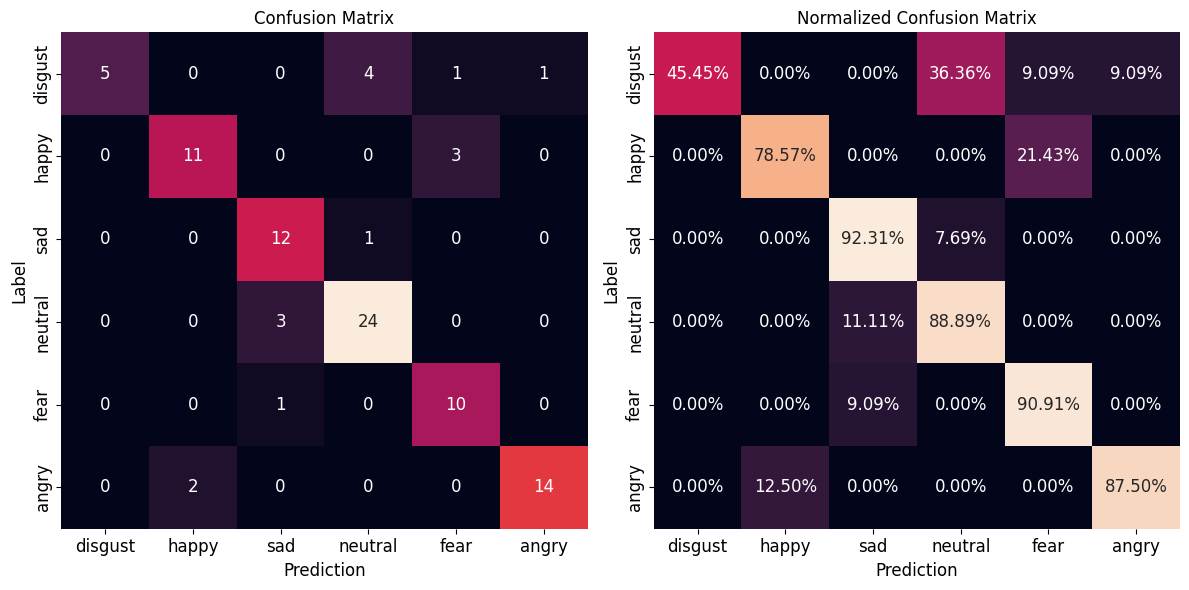

In [14]:
loaded_model = tf.keras.models.load_model("checkpoints/saveeSavedModel3/")
test_data_value = np.load('saved_dataset/saveeFix/standardSR_savee_test.npy')
test_data_target = np.load(
    'saved_dataset/saveeFix/standardSR_savee_test_target.npy')

predictions = loaded_model.predict(test_data_value)
predicted_labels = np.argmax(predictions, axis=1)
confusion_matrix = tf.math.confusion_matrix(test_data_target, predicted_labels)

test_loss, test_acc = loaded_model.evaluate(test_data_value, test_data_target)

y_pred = loaded_model.predict(test_data_value)
y_pred = tf.argmax(y_pred, axis=1)
y_true_tensor = tf.convert_to_tensor(test_data_target)

confusion_mtx = tf.math.confusion_matrix(y_true_tensor, y_pred)
confusion_array = confusion_mtx.numpy()
row_sums = confusion_array.sum(axis=1, keepdims=True)
normalized_confusion_array = confusion_array / row_sums

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].set_title('Confusion Matrix')
sns.heatmap(confusion_mtx,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='g', cbar=False, ax=axs[0], annot_kws={"fontsize": 12})
axs[0].set_xlabel('Prediction', fontsize=12)
axs[0].set_ylabel('Label', fontsize=12)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=12)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=12)

axs[1].set_title('Normalized Confusion Matrix')
sns.heatmap(normalized_confusion_array,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='.2%', cbar=False, ax=axs[1], annot_kws={"fontsize": 12})
axs[1].set_xlabel('Prediction', fontsize=12)
axs[1].set_ylabel('Label', fontsize=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

## CFM BUAT AUGMENTASI

In [16]:
model_savee = tf.keras.models.load_model("SAVEE_GN-PS")
model_ravdess = tf.keras.models.load_model("RAVDESS_TS-PS8")
model_cremad = tf.keras.models.load_model("CREMA-D_PS")

test_data_value_cremad = np.load(
    'saved_dataset/crema_d_f32_test_data_value.npy')
test_data_target_cremad = np.load('saved_dataset/crema_d_f32_test_data_target.npy')

test_data_value_ravdess = np.load("saved_dataset/ravdessFix/ravdess_test.npy")
test_data_target_ravdess = np.load("saved_dataset/ravdessFix/ravdess_test_target.npy")

test_data_value_savee = np.load('saved_dataset/saveeFix/standardSR_savee_test.npy')
test_data_target_savee = np.load(
    'saved_dataset/saveeFix/standardSR_savee_test_target.npy')

predictions = model_cremad.predict(test_data_value_cremad)  
predicted_labels_cremad = tf.argmax(predictions, axis=1)
predictions = model_ravdess.predict(test_data_value_ravdess)  
predicted_labels_ravdess = tf.argmax(predictions, axis=1)
predictions = model_savee.predict(test_data_value_savee)  
predicted_labels_savee = tf.argmax(predictions, axis=1)

precision = precision_score(test_data_target_cremad, predicted_labels_cremad, average=None)
recall = recall_score(test_data_target_cremad, predicted_labels_cremad, average=None)
f1 = f1_score(test_data_target_cremad, predicted_labels_cremad, average=None)

print("Each Class CREMA-D")
print("F1:{}".format(f1))
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))

precision = precision_score(test_data_target_ravdess, predicted_labels_ravdess, average=None)
recall = recall_score(test_data_target_ravdess, predicted_labels_ravdess, average=None)
f1 = f1_score(test_data_target_ravdess, predicted_labels_ravdess, average=None)

print("Each Class RAVDESS")
print("F1:{}".format(f1))
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))

precision = precision_score(test_data_target_savee, predicted_labels_savee, average=None)
recall = recall_score(test_data_target_savee, predicted_labels_savee, average=None)
f1 = f1_score(test_data_target_savee, predicted_labels_savee, average=None)

print("Each Class SAVEE")
print("F1:{}".format(f1))
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))


3/3 [==============================] - 1s 17ms/step
Each Class CREMA-D
F1:[0.61619718 0.66666667 0.5795207  0.68148148 0.57142857 0.73624288]
Precision:[0.55732484 0.62629758 0.64878049 0.73796791 0.61538462 0.71062271]
Recall:[0.68897638 0.71259843 0.52362205 0.63302752 0.53333333 0.76377953]
Each Class RAVDESS
F1:[0.88135593 0.84507042 0.76923077 0.73170732 0.80519481 0.93478261]
Precision:[0.92857143 0.88235294 0.83333333 0.625      0.75609756 0.93478261]
Recall:[0.83870968 0.81081081 0.71428571 0.88235294 0.86111111 0.93478261]
Each Class SAVEE
F1:[0.53333333 0.8        0.69230769 0.8852459  0.85714286 0.90322581]
Precision:[1.         0.75       0.69230769 0.79411765 0.9        0.93333333]
Recall:[0.36363636 0.85714286 0.69230769 1.         0.81818182 0.875     ]


In [22]:
print(precision_score(test_data_target_savee, predicted_labels_savee, average=None))

[1.         0.75       0.69230769 0.79411765 0.9        0.93333333]


In [17]:
confusion_matrix_cremad = tf.math.confusion_matrix(test_data_target_cremad, predicted_labels_cremad)
confusion_matrix_ravdess = tf.math.confusion_matrix(test_data_target_ravdess, predicted_labels_ravdess)
confusion_matrix_savee = tf.math.confusion_matrix(test_data_target_savee, predicted_labels_savee)

confusion_array_cremad = confusion_matrix_cremad.numpy()
row_sums = confusion_array_cremad.sum(axis=1, keepdims=True)
normalized_confusion_array_cremad = confusion_array_cremad / row_sums

confusion_array_ravdess = confusion_matrix_ravdess.numpy()
row_sums = confusion_array_ravdess.sum(axis=1, keepdims=True)
normalized_confusion_array_ravdess = confusion_array_ravdess / row_sums

confusion_array_savee = confusion_matrix_savee.numpy()
row_sums = confusion_array_savee.sum(axis=1, keepdims=True)
normalized_confusion_array_savee = confusion_array_savee / row_sums

In [11]:
# normalized_confusion_array_cremad
print("CREMAD")
print(normalized_confusion_array_cremad)
print("RAVDESS")
print(normalized_confusion_array_ravdess)
print("SAVEE")
print(normalized_confusion_array_savee)


CREMAD
[[0.68897638 0.04724409 0.08267717 0.02362205 0.05511811 0.1023622 ]
 [0.07874016 0.71259843 0.00787402 0.03543307 0.06299213 0.1023622 ]
 [0.17716535 0.01968504 0.52362205 0.09055118 0.18110236 0.00787402]
 [0.14220183 0.05963303 0.07798165 0.63302752 0.03669725 0.05045872]
 [0.09411765 0.16470588 0.1254902  0.02745098 0.53333333 0.05490196]
 [0.07480315 0.14173228 0.         0.01574803 0.00393701 0.76377953]]
RAVDESS
[[0.83870968 0.         0.06451613 0.03225806 0.         0.06451613]
 [0.         0.81081081 0.02702703 0.05405405 0.10810811 0.        ]
 [0.         0.04761905 0.71428571 0.14285714 0.0952381  0.        ]
 [0.         0.         0.05882353 0.88235294 0.05882353 0.        ]
 [0.02777778 0.05555556 0.02777778 0.         0.86111111 0.02777778]
 [0.02173913 0.         0.02173913 0.         0.02173913 0.93478261]]
SAVEE
[[0.36363636 0.18181818 0.18181818 0.27272727 0.         0.        ]
 [0.         0.85714286 0.         0.         0.07142857 0.07142857]
 [0.       

In [10]:
print(confusion_matrix_cremad)
print(confusion_matrix_ravdess)
print(confusion_matrix_savee)


tf.Tensor(
[[175  12  21   6  14  26]
 [ 20 181   2   9  16  26]
 [ 45   5 133  23  46   2]
 [ 31  13  17 138   8  11]
 [ 24  42  32   7 136  14]
 [ 19  36   0   4   1 194]], shape=(6, 6), dtype=int32)
tf.Tensor(
[[26  0  2  1  0  2]
 [ 0 30  1  2  4  0]
 [ 0  2 30  6  4  0]
 [ 0  0  1 15  1  0]
 [ 1  2  1  0 31  1]
 [ 1  0  1  0  1 43]], shape=(6, 6), dtype=int32)
tf.Tensor(
[[ 4  2  2  3  0  0]
 [ 0 12  0  0  1  1]
 [ 0  0  9  4  0  0]
 [ 0  0  0 27  0  0]
 [ 0  0  2  0  9  0]
 [ 0  2  0  0  0 14]], shape=(6, 6), dtype=int32)


In [2]:
model_savee = tf.keras.models.load_model("SAVEE_GN-PS")
model_ravdess = tf.keras.models.load_model("RAVDESS_TS-PS8")
model_cremad = tf.keras.models.load_model("CREMA-D_PS")

test_data_value_cremad = np.load(
    'saved_dataset/crema_d_f32_test_data_value.npy')
test_data_target_cremad = np.load('saved_dataset/crema_d_f32_test_data_target.npy')

test_data_value_ravdess = np.load("saved_dataset/ravdessFix/ravdess_test.npy")
test_data_target_ravdess = np.load("saved_dataset/ravdessFix/ravdess_test_target.npy")

test_data_value_savee = np.load('saved_dataset/saveeFix/standardSR_savee_test.npy')
test_data_target_savee = np.load(
    'saved_dataset/saveeFix/standardSR_savee_test_target.npy')

predictions = model_cremad.predict(test_data_value_cremad)  
predicted_labels_cremad = tf.argmax(predictions, axis=1)
predictions = model_ravdess.predict(test_data_value_ravdess)  
predicted_labels_ravdess = tf.argmax(predictions, axis=1)
predictions = model_savee.predict(test_data_value_savee)  
predicted_labels_savee = tf.argmax(predictions, axis=1)

precision = precision_score(test_data_target_cremad, predicted_labels_cremad, average=None)
recall = recall_score(test_data_target_cremad, predicted_labels_cremad, average=None)
f1 = f1_score(test_data_target_cremad, predicted_labels_cremad, average=None)

print("Each Class CREMA-D")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

precision = precision_score(test_data_target_ravdess, predicted_labels_ravdess, average=None)
recall = recall_score(test_data_target_ravdess, predicted_labels_ravdess, average=None)
f1 = f1_score(test_data_target_ravdess, predicted_labels_ravdess, average=None)

print("Each Class RAVDESS")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

precision = precision_score(test_data_target_savee, predicted_labels_savee, average=None)
recall = recall_score(test_data_target_savee, predicted_labels_savee, average=None)
f1 = f1_score(test_data_target_savee, predicted_labels_savee, average=None)

print("Each Class SAVEE")
print("Precision:{}".format(precision))
print("Recall:{}".format(recall))
print("F1:{}".format(f1))

3/3 [==============================] - 2s 87ms/step
Each Class CREMA-D
Precision:[0.55732484 0.62629758 0.64878049 0.73796791 0.61538462 0.71062271]
Recall:[0.68897638 0.71259843 0.52362205 0.63302752 0.53333333 0.76377953]
F1:[0.61619718 0.66666667 0.5795207  0.68148148 0.57142857 0.73624288]
Each Class RAVDESS
Precision:[0.92857143 0.88235294 0.83333333 0.625      0.75609756 0.93478261]
Recall:[0.83870968 0.81081081 0.71428571 0.88235294 0.86111111 0.93478261]
F1:[0.88135593 0.84507042 0.76923077 0.73170732 0.80519481 0.93478261]
Each Class SAVEE
Precision:[1.         0.75       0.69230769 0.79411765 0.9        0.93333333]
Recall:[0.36363636 0.85714286 0.69230769 1.         0.81818182 0.875     ]
F1:[0.53333333 0.8        0.69230769 0.8852459  0.85714286 0.90322581]


In [ ]:
predictions = model_cremad.predict(test_data_value_cremad)  

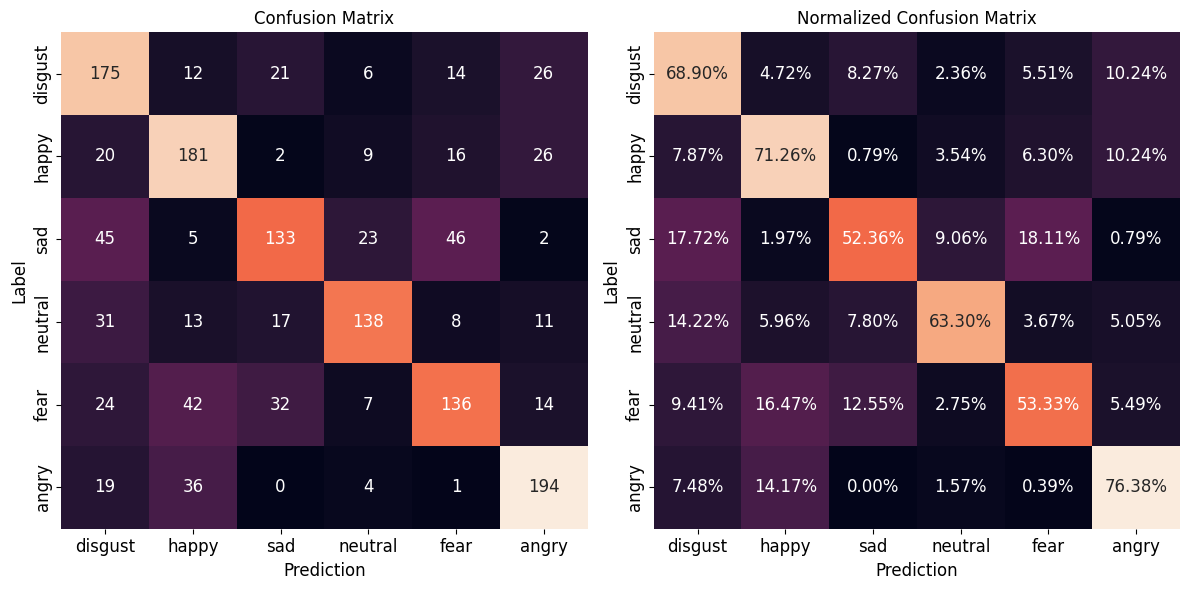

In [18]:
# predictions = loaded_model.predict(test_data_value)
# predicted_labels = np.argmax(predictions, axis=1)
# confusion_matrix = tf.math.confusion_matrix(test_data_target, predicted_labels)

# test_loss, test_acc = loaded_model.evaluate(test_data_value, test_data_target)

# y_pred = loaded_model.predict(test_data_value)
# y_pred = tf.argmax(y_pred, axis=1)
# y_true_tensor = tf.convert_to_tensor(test_data_target)

confusion_mtx = confusion_matrix_cremad
confusion_array = confusion_mtx.numpy()
row_sums = confusion_array.sum(axis=1, keepdims=True)
normalized_confusion_array = confusion_array / row_sums

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].set_title('Confusion Matrix')
sns.heatmap(confusion_mtx,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='g', cbar=False, ax=axs[0], annot_kws={"fontsize": 12})
axs[0].set_xlabel('Prediction', fontsize=12)
axs[0].set_ylabel('Label', fontsize=12)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=12)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=12)

axs[1].set_title('Normalized Confusion Matrix')
sns.heatmap(normalized_confusion_array,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='.2%', cbar=False, ax=axs[1], annot_kws={"fontsize": 12})
axs[1].set_xlabel('Prediction', fontsize=12)
axs[1].set_ylabel('Label', fontsize=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

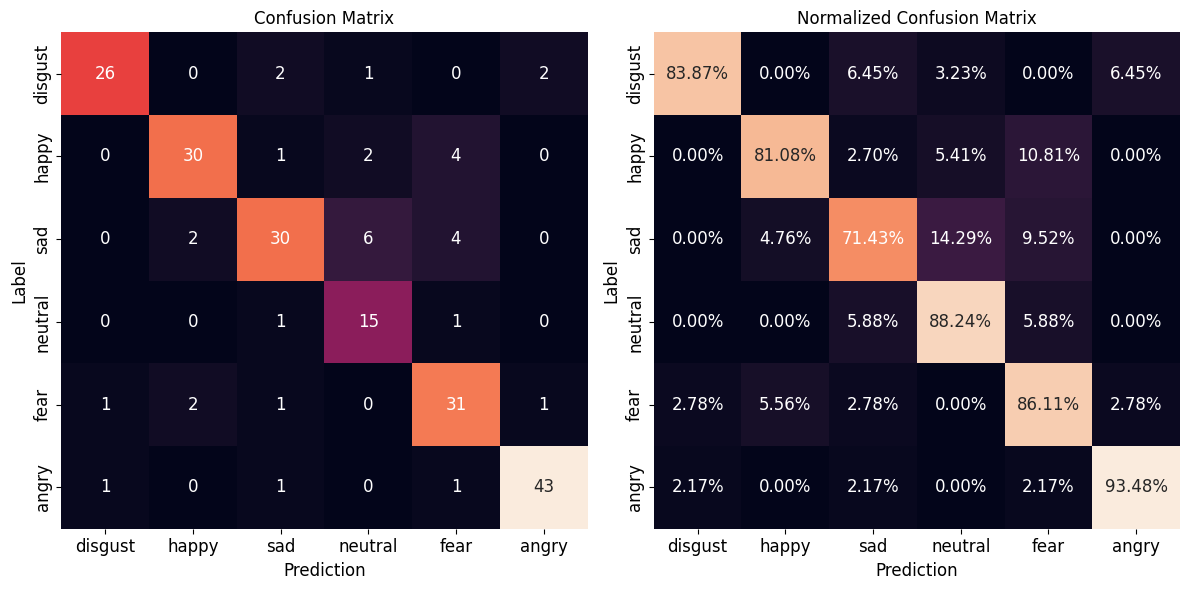

In [19]:
confusion_mtx = confusion_matrix_ravdess
confusion_array = confusion_mtx.numpy()
row_sums = confusion_array.sum(axis=1, keepdims=True)
normalized_confusion_array = confusion_array / row_sums

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].set_title('Confusion Matrix')
sns.heatmap(confusion_mtx,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='g', cbar=False, ax=axs[0], annot_kws={"fontsize": 12})
axs[0].set_xlabel('Prediction', fontsize=12)
axs[0].set_ylabel('Label', fontsize=12)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=12)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=12)

axs[1].set_title('Normalized Confusion Matrix')
sns.heatmap(normalized_confusion_array,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='.2%', cbar=False, ax=axs[1], annot_kws={"fontsize": 12})
axs[1].set_xlabel('Prediction', fontsize=12)
axs[1].set_ylabel('Label', fontsize=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

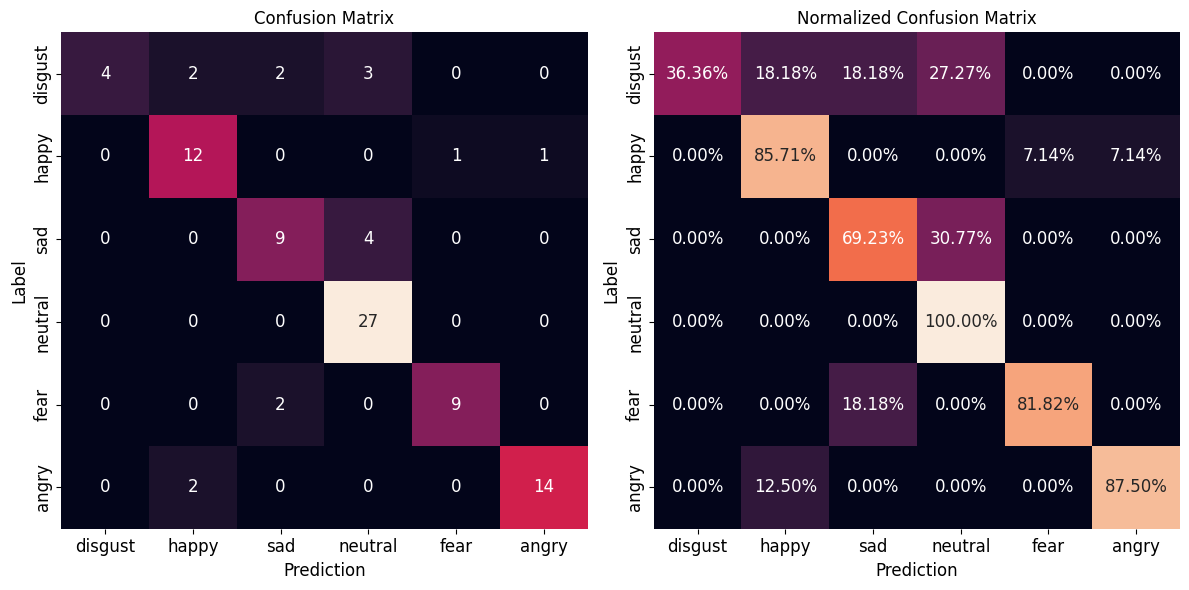

In [20]:
confusion_mtx = confusion_matrix_savee
confusion_array = confusion_mtx.numpy()
row_sums = confusion_array.sum(axis=1, keepdims=True)
normalized_confusion_array = confusion_array / row_sums

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].set_title('Confusion Matrix')
sns.heatmap(confusion_mtx,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='g', cbar=False, ax=axs[0], annot_kws={"fontsize": 12})
axs[0].set_xlabel('Prediction', fontsize=12)
axs[0].set_ylabel('Label', fontsize=12)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=12)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=12)

axs[1].set_title('Normalized Confusion Matrix')
sns.heatmap(normalized_confusion_array,
            xticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            yticklabels=["disgust", "happy", "sad", "neutral", "fear", "angry"],
            annot=True, fmt='.2%', cbar=False, ax=axs[1], annot_kws={"fontsize": 12})
axs[1].set_xlabel('Prediction', fontsize=12)
axs[1].set_ylabel('Label', fontsize=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=12)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

## TEST

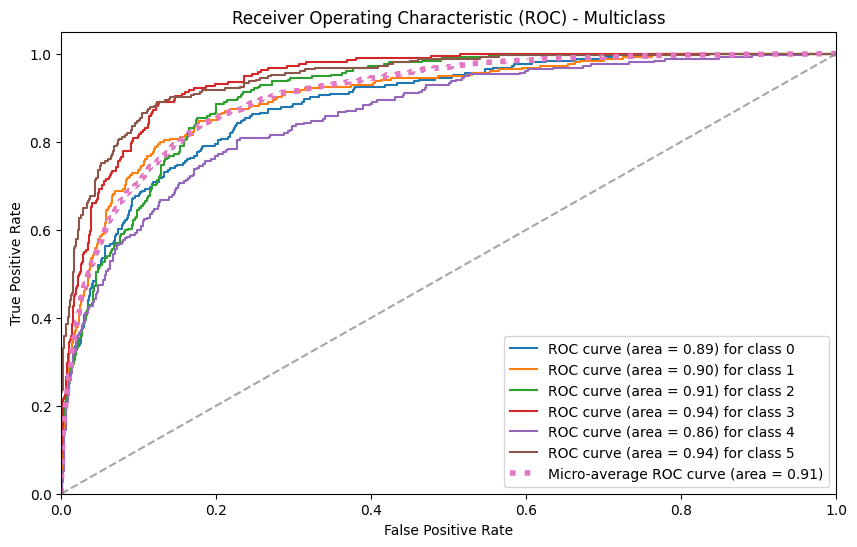

In [17]:
from sklearn.preprocessing import label_binarize

# Compute the number of classes
num_classes = predictions.shape[1]
# print(num_classes)

# # Compute the One-vs-All ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

test_data_target_cremad_onehot = label_binarize(test_data_target_cremad, classes=range(num_classes))

for i in range( num_classes):
    # print(i)
    fpr[i], tpr[i], _ = roc_curve(test_data_target_cremad_onehot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(test_data_target_cremad_onehot.ravel(), predictions.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average AUC
roc_auc_macro = np.mean(list(roc_auc.values()))

# Plot the ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro, linestyle=':', linewidth=4)

# Plot a diagonal line representing random classification
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

In [25]:
print(test_data_target_cremad_onehot[5])
print(test_data_target_cremad[5])

[1 0 0 0 0 0]
0


In [32]:
test_data_target_cremad_onehot[:, 5]

array([0, 1, 1, ..., 0, 1, 0])

ValueError: Unknown format code 'd' for object of type 'float'

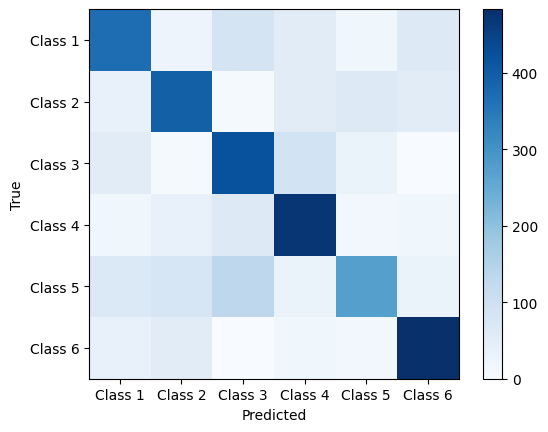

In [3]:
import numpy as np
import matplotlib.pyplot as plt

confusion_matrix = np.array([[61, 4, 14, 9, 3, 10],
                            [6, 65, 1, 9, 10, 9],
                            [9, 1, 70, 15, 5, 0],
                            [3, 6, 10, 78, 2, 3],
                            [11, 13, 22, 5, 45, 5],
                            [6, 9, 0, 3, 2, 80]])

# Convert the percentages to actual values
confusion_matrix_values = (confusion_matrix / 100) * np.sum(confusion_matrix)

# Plot the confusion matrix with color
plt.imshow(confusion_matrix_values, cmap='Blues')
plt.colorbar()

# Add labels to the plot
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
num_classes = len(classes)
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted')
plt.ylabel('True')

# Add values inside the plot
thresh = confusion_matrix_values.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(confusion_matrix_values[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_values[i, j] > thresh else "black")

# Show the plot
plt.tight_layout()
plt.show()